<hr style="border:2px solid gray">

## CIVIL-349 Traffic Engineering | Fall 2023

#### Lab Assignment 1: Studying traffic flow properties through real trajectory datasets collected by a swarm of drones

<hr style="border:2px solid gray">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from bisect import bisect_left

Three functions that should help you solve the exercises are provided below. Please do not change anything in the following four code cells defining the functions `lab1_vehicle_data`, `lab1_plot_TS_diag`, `lab1_spacings` and `lab1_headways`.

In [2]:
def lab1_vehicle_data(vehID, lanes):
    '''
    Function to load vehicle trajectory data from the same directory as this notebook.
    
    Input:
    vehID        int; ID of vehicle as specified in the file names
    lanes        str; 'all' or 'central' according to the task
    
    Returns:
    time         1D np.array; time instances where data is recorded for the specified vehicle
    space        1D np.array; instantaneous positions at the specified time
    speed        1D np.array; instantaneous speeds at the specified time
    '''
    data = pd.read_csv(lanes + '_lanes/' + f'trajectory{vehID}.csv')
    time, space, speed = data['Time[s]'], data['Distance[m]'], data['Speed[km / h]']

    time = time.dropna()
    space = space.dropna()
    speed = speed.dropna()
    
    return np.array(time), np.array(space), np.array(speed)

In [3]:
def lab1_plot_TS_diag(time, space, speed):
    '''
    Function to generate the time-space diagram for one vehicle; colour bar for speed variation
    
    Input:
    time         1D np.array; time instances where data is recorded for the specified vehicle
    space        1D np.array; instantaneous positions at the specified time
    speed        1D np.array; instantaneous speeds at the specified time
    
    Returns:
    Plot of one vehicle trajectory
    
    Colorbar reference: 
    https://scipy-cookbook.readthedocs.io/items/Matplotlib_MulticoloredLine.html
    '''
    points = np.array([time, space]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
    lc.set_array(speed)
    lc.set_linewidth(0.4)   
    plt.gca().add_collection(lc)
    
    return

In [4]:
def lab1_spacings(time, space, speed, all_t):
    '''
    Determines the position of a vehicle at specified times, through interpolation of 
    measurements at different times and using speed information.
    
    Input:
    time         1D np.array; time instances where data is recorded for the specified vehicle
    space        1D np.array; instantaneous positions at the specified time
    speed        1D np.array; instantaneous speeds at the specified time
    all_t        1D np.array; times where we would like to interpolate the position of a vehicle
    
    Returns:
    spaces_at_t  1D np.array; positions of a vehicle at different times of interest

    '''
    # interpolate using space and speed to obtain location at every t_i + dt*i
    # convert km/h /3.6 = m/s
    idx_l = [bisect_left(time, t) - 1 for t in all_t]
    spaces_at_t = (all_t - time[idx_l]) * (speed[idx_l] / 3.6) + space[idx_l]        

    return spaces_at_t

In [5]:
def lab1_headways(time, space, speed, all_s):
    '''
    Determines the time at which a vehicle passes specified locations, through interpolation of 
    measurements from nearby locations and using speed information.
    
    Input:
    time         1D np.array; time instances where data is recorded for the specified vehicle
    space        1D np.array; instantaneous positions at the specified time
    speed        1D np.array; instantaneous speeds at the specified time
    all_s        1D np.array; locations where we would like to interpolate the passing time of a vehicle
    
    Returns:
    headways_at_s  1D np.array; times that a vehicle passes different stationary observers
    '''
    # interpolate using time and speed to obtain location at every s_i + ds*i
    # convert km/h /3.6 = m/s
    
    idx_l = [bisect_left(space, s) - 1 for s in all_s]
    headways_at_s = (all_s - space[idx_l]) / (speed[idx_l] / 3.6) + time[idx_l]        

    return headways_at_s

<hr style="border: 1px solid gray">

## Task 1: Time-Space Diagrams

<hr style="border: 1px solid gray">

In the first task, you are asked to create the Time-Space diagram referring to the road segment of interest from $x = 0\:\text{m}$ to $x = 360\:\text{m}$, where the trajectories of all the vehicles observed will be plotted between $t = 0\:\text{sec}$ and $t = 900\:\text{sec}$. You will then use this data to perform some analysis on headway, spacing, queueing characteristics and answer questions listed in the lab handout.

### Task 1.1 Time-space diagram for all lanes

<hr style="border: 1px solid gray">

Plot the trajectories of all the vehicles provided in the dataset in a single Time-Space diagram.

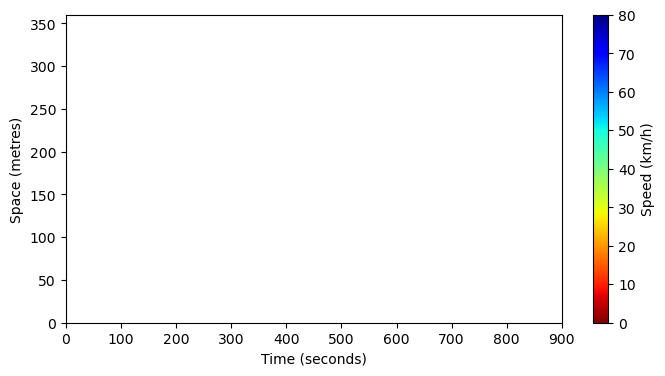

In [6]:
# vehicle IDs are contained in the file names
# note that they are numbered consecutively starting at 1
num_of_files = 357

# generate time-space diagram
fig, ax = plt.subplots(figsize=(8, 4))

#################### YOUR CODE HERE ####################
# hint: you can use the functions defined above,
#       lab1_vehicle_data and lab1_plot_TS_diag


    
########################################################

# set axis limit and labels

plt.xlim(0, 900)
plt.ylim(0, 360)
plt.xlabel('Time (seconds)')
plt.ylabel('Space (metres)')

# set colour bar with some empty lists

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')

# save figure
# fig.savefig('Figures/time_space_all.pdf', bbox_inches='tight', dpi=300)

 Based on the Time-Space diagram, answer the questions listed in 1.1.b.

### Task 1.2 Time-space diagram for central lane only

<hr style="border: 1px solid gray">

Plot the trajectories of all the vehicles in the central lane provided in the dataset in a single Time-Space diagram, in the same way as in Task 1.1.

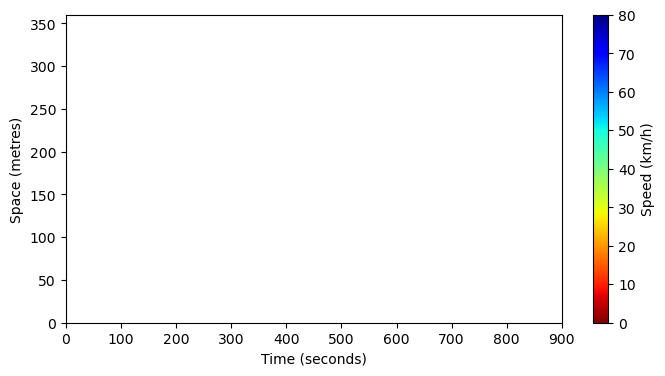

In [7]:
# vehicle IDs are contained in the file names
# note that they are numbered consecutively starting at 1
num_of_files = 46

# generate time-space diagram
fig, ax = plt.subplots(figsize=(8, 4))

#################### YOUR CODE HERE ####################
# hint: you can use the functions defined above,
#       lab1_vehicle_data and lab1_plot_TS_diag


    
########################################################

# set axis limit and labels

plt.xlim(0, 900)
plt.ylim(0, 360)
plt.xlabel('Time (seconds)')
plt.ylabel('Space (metres)')

# set colour bar with some empty lists

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')


# save figure
# fig.savefig('Figures/time_space_central.pdf', bbox_inches='tight', dpi=300)

Based on the Time-Space diagram answer the questions listed in 1.2.b.

Take the sequence of vehicle trajectories $[11, 12, 13, 14, 15]$ in the Time-Space diagram of question 1.2.a. Plot them separately in the same plot, and estimate the average spacing $\overline{s}$ and the average headway $\overline{h}$ as described in the lab handout.

In [8]:
vehicles = [11, 12, 13, 14, 15]

#### Time-Space diagram

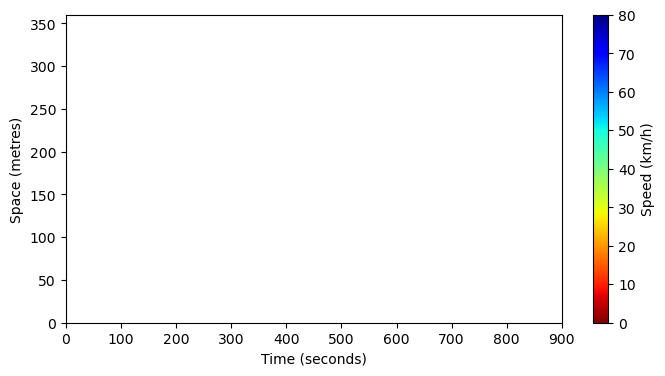

In [9]:
# generate time-space diagram
fig, ax = plt.subplots(figsize=(8, 4))

#################### YOUR CODE HERE ####################
# hint: you can use the functions defined above,
#       lab1_vehicle_data and lab1_plot_TS_diag


    
########################################################

# set axis limit and labels

plt.xlim(0, 900)
plt.ylim(0, 360)
plt.xlabel('Time (seconds)')
plt.ylabel('Space (metres)')

# set colour bar with some empty lists

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')

# save figure
# fig.savefig('Figures/time_space_5veh.pdf', bbox_inches='tight', dpi=300)

#### Average spacing over time

Estimate the average spacing $\overline{s}$ between the selected group of vehicles over time for the selected period. Plot a graph to visualize the evolution of the average spacing over time and calculate the mean and the standard deviation of the average spacing.

When calculating the average spacing at a particular moment in time and the average headway (next part) at given points along the road, be careful about the order in which the five vehicles appear, e.g., when calculating the average headway at a location, make sure you check which vehicle comes first, which one comes second etc. 

In [10]:
t_i = 250           # start time [s]
T = 100             # period of observation [s]
dt = 1              # time between two observations [s]

all_t = np.linspace(t_i, t_i+T, int(T/dt+1))

#################### YOUR CODE HERE ####################
# hint: you can use the functions defined above, 
#       lab1_vehicle_data and lab1_spacings



########################################################

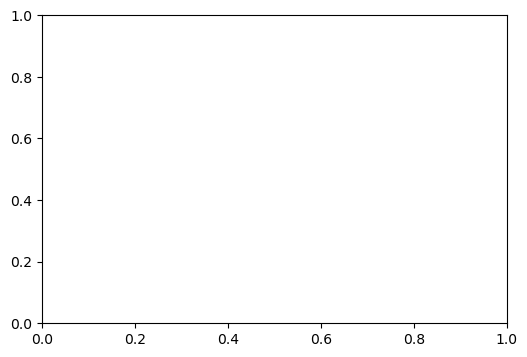

In [11]:
# create avg spacing vs time diagram

fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

# fig.savefig('Figures/avg_spacing_time.pdf', bbox_inches='tight', dpi=300)

In [12]:
# calculate mean and standard deviation of the average spacing

mean_avg_spacing = None
std_avg_spacing  = None

#################### YOUR CODE HERE ####################




########################################################

print('Mean average spacing: '+str(mean_avg_spacing))
print('Standard deviation of the average spacing: '+str(std_avg_spacing))

Mean average spacing: None
Standard deviation of the average spacing: None


#### Average headway over the selected segment

Estimate the average headway $\overline{h}$ between the selected group of vehicles observed by 10 different stationary observers on the road. Plot a graph to visualize the evolution of the average headway over the length of the selected distance (defined by the 10 points of the stationary observers) and calculate the mean and the standard deviation of the average headway.

In [13]:
s_i = 10 # metres
ds = 25
num_s = 10
all_s = np.linspace(s_i, s_i+(num_s-1)*ds, num_s)

#################### YOUR CODE HERE ####################
# hint: you can use the functions defined above, 
#       lab1_vehicle_data and lab1_headways



########################################################


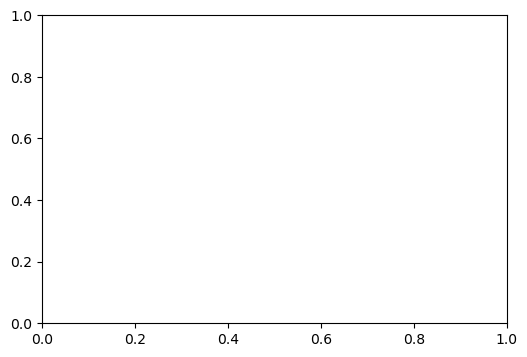

In [14]:
# create avg spacing vs time diagram

fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

# fig.savefig('Figures/avg_spacing_time.pdf', bbox_inches='tight', dpi=300)

In [15]:
# calculate mean and standard deviation of the average headway

mean_avg_headway = None
std_avg_headway  = None

#################### YOUR CODE HERE ####################



########################################################

print('Mean of the average headway: '+str(mean_avg_headway))
print('Standard deviation of the average headway: '+str(std_avg_headway))

Mean of the average headway: None
Standard deviation of the average headway: None


Based on the previous two plots, answer the questions listed in 1.2.d.

### Task 1.3  Queueing analysis for all lanes

<hr style="border: 1px solid gray">

You will now analyze the arrival and the departure of vehicles at $x_1=290\:\text{m}$ as an M/G/1 queuing system, for the entire duration between $t=0\:\text{sec}$ and $t=900\:\text{sec}$ as explained in the lab handout.

In [16]:
s_start = 160
s_end = 290

num_of_files = 357

#### Estimating vehicle mean arrival rate $\lambda\:\left[veh/second\right]$

Plot the histogram of the interarrival times between vehicles and comment on the goodness-of-fit of the Poisson distribution assumption

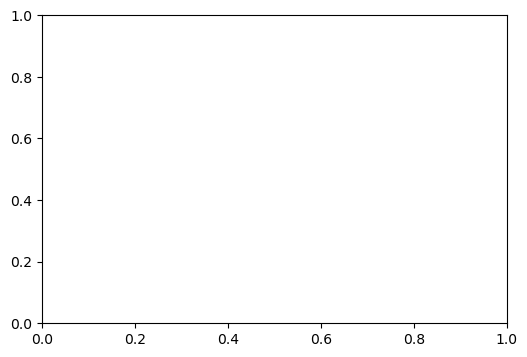

In [17]:
# create histogram of the interarrival times

bins = 40

fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################
# hint: you can use the functions numpy.histogram



########################################################

# fig.savefig('Figures/interarrivals.pdf', bbox_inches='tight', dpi=300)

To fit the exponential distribution function you will use the built-in functions `expon` and `curve_fit` of the $\textbf{scipy}$ library. 

In [18]:
from scipy.stats import expon
from scipy.optimize import curve_fit

def exponential_pdf(x, scale):
    return expon.pdf(x, scale=scale)

Based on the created histogram, and by consulting the official documentation of the scipy library, create a suitable data set $\mathcal{D}$ described by `x_data` and `y_data` as explained in the lab handout.

In [19]:
x_data = None
y_data = None

#################### YOUR CODE HERE ####################



########################################################
#Print data for verification 

data_merged = np.zeros((len(x_data), 2))
data_merged[:,0] = x_data
data_merged[:,1] = y_data
print(data_merged)

TypeError: object of type 'NoneType' has no len()

Using `x_data` and `y_data` fit a continuous probability distribution function of an exponentially distributed random variable and report the estimated $\lambda$ value.

In [ ]:
lambda_hat = None

#################### YOUR CODE HERE ####################



########################################################

print('Vehicle mean arrival rate: '+str(lambda_hat))


Vehicle mean arrival rate: None


In the same figure plot the empirical pdf obtained from the histogram in part b.1 and the one obtained using the fitting procedure and comment on the obtained result.

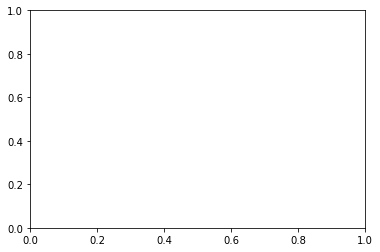

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

# fig.savefig('Figures/empirical_vs_obtained_pdf.pdf', bbox_inches='tight', dpi=300)

Assume now that the service times follow the Erlang distribution. For the arrival rate $\lambda$ found in b.3 plot the corresponding service rate $\mu$ in [veh/second] as a function of the average queue length $L_Q\in(0,\infty)$ and comment on the obtained shape of the curve.

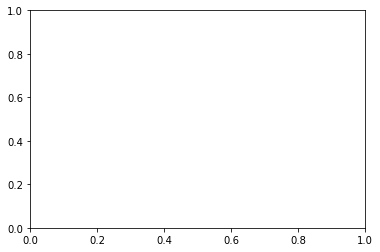

In [ ]:
L_q = np.linspace(0.1, 100, 10000)

fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

# fig.savefig('Figures/service_rate.pdf', bbox_inches='tight', dpi=300)

Finally, calculate the service rate that yields $L_Q=2\text{ veh}$ and the theoretical average queuing time $w_Q$ in that case.

In [ ]:
mu = None
w_Q = None

#################### YOUR CODE HERE ####################



########################################################

print('Service rate that yields average queue length of 2: '+str(mu))
print('Corresponding queuing time: '+str(w_Q))

Service rate that yields average queue length of 2: None
Corresponding queuing time: None


<hr style="border: 1px solid gray">

## Task 2: Fundamental Diagram

<hr style="border: 1px solid gray">

In this task, you will estimate and plot the Fundamental Diagram (FD) between flow $q$ and density $k$ for two segments of the given road, based on the given trajectory datasets and according to the instructions given in the lab handout.

In [ ]:
# parameters

dt = 10             # time between observations [s]
t_start = 0         # start time of observation [s]
t_end = 900         # end time of obsevation [s]
T = t_end - t_start # [s]

L_A = 280           # location of observer A [m]
L_B = L_A - 75      # location of observer B [m]

all_times = np.linspace(0, T, int(T/dt)+1)

num_of_files = 357

#### Estimate the flow $q\:\left[\text{veh/min}\right]$

In [ ]:
n_A = np.zeros(int(T/dt))   # number of vehicles passing observer, every dt seconds.
n_B = np.zeros(int(T/dt))   # n_X[i] refers to the vehicle count between t=i*dt and t=(i+1)*dt

q_A = np.zeros(int(T/dt)) 
q_B = np.zeros(int(T/dt))

#################### YOUR CODE HERE ####################



########################################################

#### Estimate the density $k\:\left[\text{veh/m}\right]$

To calculate the densities, you should first update arrays `x_A` and `x_B`, where the
i-th element of the array (you can think of it as the i-th ‘bin’) can be calculated as the number of vehicles that were in the observed road segment from time $i\cdot dt$ to time $(i+1)\cdot dt$. The sentence about the midpoint of the time interval just tells you that we consider a particular vehicle to be present on the road segment in the time interval $[i\cdot dt, (i+1)\cdot dt]$ if it is present on the road segment
at time $i\cdot dt + 0.5 dt$, where $dt$ = 10 seconds. Therefore, all you need to do is to check for each vehicle in which time ‘bins’ of the two arrays `x_A` and `x_B` they appear and calculate the corresponding values of `k_A` and `k_B`; the `lab1_headways()` function can help you with this.

In [ ]:
L = 50                      # distance upstream to measure density [m]

x_A = np.zeros(int(T/dt))   # number of vehicles inside a 50m segment, every dt seconds
x_B = np.zeros(int(T/dt))   # x_Y[i] refers to the vehicle count between t=i*dt and t=(i+1)*dt

k_A = np.zeros(int(T/dt))   
k_B = np.zeros(int(T/dt))

#################### YOUR CODE HERE #################### 



########################################################

Plot the FDs for the two segments of the given road.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


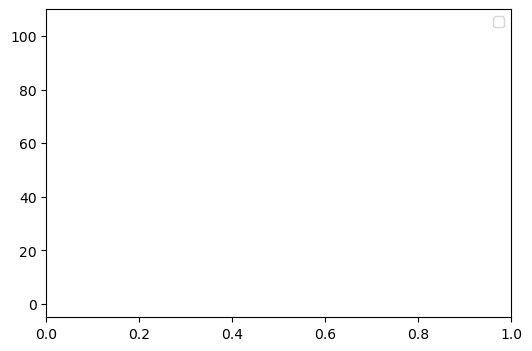

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE #################### 



########################################################

plt.ylim(-5, 110)
plt.legend()

# fig.savefig('Figures/q_k.pdf', bbox_inches='tight', dpi=300)

Based on the obtained FD, answer the questions listed in 2.b.

You will now try to formulate a mathematical way to describe the Fundamental Diagram and identify its basic properties like critical (maximum) flow $q_{\text{crit}}$, density $k_{\text{crit}}$ and jam density $k_{\text{jam}}$ based on the method presented in the lab handout.

#### Four-point method for FD fitting with a $3^{rd}$ degree polymomial

First merge all observed data points (from observers A and B) in a single dataset.

In [ ]:
q_all = None
k_all = None

#################### YOUR CODE HERE ####################



########################################################

Now complete the function for finding the four point that are the closest to the corner of the rectangle described in the lab handout.

In [ ]:
def lab1_FD_points(q_all, k_all):
    '''
    Find four data points that are closest to the corners 
    defined by the max. and min. of the data points.
    
    Input:
    q_all        1D np.array; all flow data points from both stationary observers
    k_all        1D np.array; all density data points from both stationary observers
    
    Returns:
    points       2D np.array; shape=(4, 2). Four data points nearest to the corners
    '''    
    
    points = np.zeros((4, 2))
    
    #################### YOUR CODE HERE ####################
    
    
        
    ########################################################
    
    return points

Using this function prepare the data for the four-point method and fit a 3-rd degree polynomial function $y=ax^3+bx^2+cx+d$.

In [ ]:
# prepare points and fit cubic polynomial of the form y=ax**3+bx**2+cx+d

z = None    # z is the vector of parameters z = [a,b,c,d]

#################### YOUR CODE HERE ####################



########################################################

print('Parameters of the 3-rd order polynomial are a:'+str(z[0])+' ,b:'+str(z[1])+' ,c:'+str(z[2])+' ,d:'+str(z[3]))

TypeError: 'NoneType' object is not subscriptable

Report the mathematical expression of the FD and plot it in the same graph from question 2.a.

No handles with labels found to put in legend.


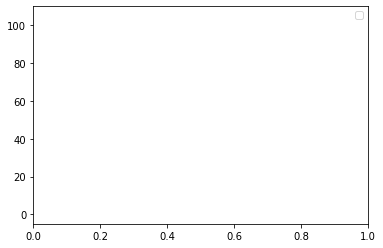

In [ ]:
# generate points to draw the curve of the best fit 

fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

plt.ylim(-5, 110)
plt.legend()

# fig.savefig('Figures/q_k_poly.pdf', bbox_inches='tight', dpi=300)

Based on the FD that you fitted in the previous question, answer the questions listed in 2.d.

<hr style="border: 1px solid gray">

## Task 3: Input-Output Diagrams

<hr style="border: 1px solid gray">

In this task, you will create an Input-Output diagram for the given road segment over time over all lanes. The Input curve represents the cumulative number of vehicles that have entered the road segment of interest over time while the Output curve represents the cumulative number of vehicles that have exited the road segment over time, as explained in the lab handout.

In [ ]:
L_C = 230           # entrance, distance along road [m]
L_D = 280           # exit, distance along road [m]

t_start = 0         # start time of observation [s]
t_end = 900         # end time of obsevation [s]
T = t_end - t_start # [s]
dt = 5              # time step [s]

num_of_files = 357

At the end of each time step $dt$, calculate the cumulative number of vehicles that have passed points C and D as described in 3.a.

In [ ]:
io_time = np.linspace(0, T, int(T/dt + 1))

N_C = np.zeros_like(io_time)
N_D = np.zeros_like(io_time)

#################### YOUR CODE HERE ####################



########################################################


Based on the calculated values, plot the two sets of points as continuous lines in a common graph. The function `plt.step()` can be useful for creating a nice visualization.

No handles with labels found to put in legend.


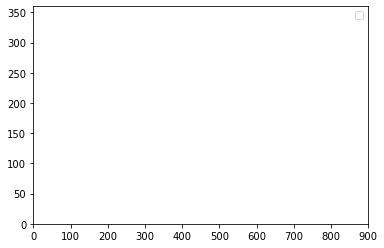

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

plt.xlim(0, 900)
plt.ylim(0, 360)
plt.legend()

# fig.savefig('Figures/io_diagram.pdf', bbox_inches='tight', dpi=300)

Based on the I/O diagram that you created answer the questions listed in 3.b.

#### Total time spent in the road segment by all vehicles

Calculate the total time spent in the road segment by all vehicles during the time period considered for the I/O diagram (in $\left[\text{veh}\cdot\text{min}\right]$).

In [ ]:
TTS = None 

#################### YOUR CODE HERE ####################



########################################################

print('Total times spent in the road segment by all vehicles: '+str(TTS))

Total times spent in the road segment by all vehicles: None


#### Min, max, mean time that vehicles spend in this segment; plot distribution in histogram

Using the trajectory data, estimate the minimum, maximum and the mean time that vehicles spend inside this road segment. Plot the distribution of the time spent in the form of a histogram and comment on the result.

In [ ]:
min_spent  = None
max_spent  = None
mean_spent = None 

#################### YOUR CODE HERE ####################



########################################################

print('Minimum time that a vehicle spent inside the road segment: '+str(min_spent))
print('Maximum time that a vehicle spent inside the road segment: '+str(max_spent))
print('Mean time that a vehicle spent inside the road segment: '+str(mean_spent))

Minimum time that a vehicle spent inside the road segment: None
Maximum time that a vehicle spent inside the road segment: None
Mean time that a vehicle spent inside the road segment: None


(0.0, 80.0)

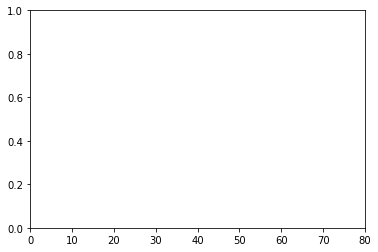

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

plt.xlim(0, 80)

# fig.savefig('Figures/hist_time_spent.pdf', bbox_inches='tight', dpi=300)

#### Min, max, mean number of vehicles that are present in the segment over time; plot distribution in histogram

Using the data that you plotted in the I/O diagram, estimate the minimum, maximum and mean number of vehicles that are present in the road segment over time. Note that you should begin your analysis at the time which the first vehicle(s) enter the road segment. Plot the distribution of the number of vehicles inside in the form of a histogram and comment on the results. When you create the plot, please adjust it based on the values you calculated. Also, please choose an arbitrary number of bins that allows you to nicely plot the results, for parts 3d and part 3e.

In [ ]:
min_veh  = None
max_veh  = None
mean_veh = None

#################### YOUR CODE HERE ####################



########################################################

print('Minimum number of vehicles inside the road segment: '+str(min_veh))
print('Maximum number of vehicles inside the road segment: '+str(max_veh))
print('Mean number of vehicles inside the road segment: '+str(mean_veh))

Minimum number of vehicles inside the road segment: None
Maximum number of vehicles inside the road segment: None
Mean number of vehicles inside the road segment: None


(0.0, 30.0)

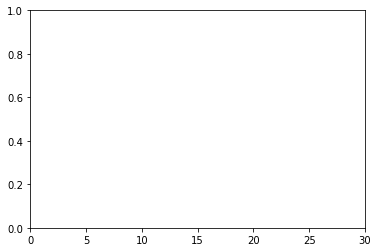

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

#################### YOUR CODE HERE ####################



########################################################

plt.xlim(0, 30)

# fig.savefig('Figures/hist_num_veh.pdf', bbox_inches='tight', dpi=300)

<hr style="border: 1px solid gray">

## Task 4: Shockwave Analysis

<hr style="border: 1px solid gray">

Use graphical methods to answer the questions in this section of the lab handout.